In [1]:
import numpy as np
import pandas as pd
import keras

Using TensorFlow backend.


# Importing Data

In [2]:
BBB_Train = pd.read_csv("BBB_LSTM_Input_Train.csv", index_col=0)
DDD_Train = pd.read_csv("DDD_LSTM_Input_Train.csv", index_col=0)
FFF_Train = pd.read_csv("FFF_LSTM_Input_Train.csv", index_col=0)

BBB_Test = pd.read_csv("BBB_LSTM_Input_Test.csv", index_col=0)
DDD_Test = pd.read_csv("DDD_LSTM_Input_Test.csv", index_col=0)
FFF_Test = pd.read_csv("FFF_LSTM_Input_Test.csv", index_col=0)

# Transforming Data

#### Normalize variables for every course  per semester

In [3]:
BBB_Train.head()

,id_student,code_presentation,Decile,Avg_Clicks,Asgmts,Avg_Asgmt_Score,final_result
1,1008675,2013B,0,2.181818,0,0.000000,Pass
2,1008675,2013B,1,12.391304,1,70.000000,Pass
4,1008675,2013B,2,12.875000,1,65.000000,Pass
5,1008675,2013B,3,7.250000,1,56.666667,Pass
6,1008675,2013B,4,5.166667,1,55.250000,Pass


In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
Semesters_Train = BBB_Train.code_presentation.unique()
dfs_Train = list([BBB_Train, DDD_Train, FFF_Train])
Semesters_Test = BBB_Test.code_presentation.unique()
dfs_Test = list([BBB_Test, DDD_Test, FFF_Test])

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))

for i in range(0,len(dfs_Train)):
    for j in range(0,len(Semesters_Train)):
        scaler.fit(dfs_Train[i].loc[dfs_Train[i]["code_presentation"]==Semesters_Train[j], "Avg_Clicks":"Avg_Asgmt_Score"])
        dfs_Train[i].loc[dfs_Train[i]["code_presentation"]==Semesters_Train[j], "Avg_Clicks":"Avg_Asgmt_Score"] = scaler.transform(dfs_Train[i].loc[dfs_Train[i]["code_presentation"]==Semesters_Train[j], "Avg_Clicks":"Avg_Asgmt_Score"])


for i in range(0,len(dfs_Test)):
    for j in range(0,len(Semesters_Test)):
        scaler.fit(dfs_Test[i].loc[dfs_Test[i]["code_presentation"]==Semesters_Test[j], "Avg_Clicks":"Avg_Asgmt_Score"])
        dfs_Test[i].loc[dfs_Test[i]["code_presentation"]==Semesters_Test[j], "Avg_Clicks":"Avg_Asgmt_Score"] = scaler.transform(dfs_Test[i].loc[dfs_Test[i]["code_presentation"]==Semesters_Test[j], "Avg_Clicks":"Avg_Asgmt_Score"])

In [7]:
BBB_Train.head()

,id_student,code_presentation,Decile,Avg_Clicks,Asgmts,Avg_Asgmt_Score,final_result
1,1008675,2013B,0,0.019416,0.000000,0.000000,Pass
2,1008675,2013B,1,0.110267,0.142857,0.700000,Pass
4,1008675,2013B,2,0.114572,0.142857,0.650000,Pass
5,1008675,2013B,3,0.064516,0.142857,0.566667,Pass
6,1008675,2013B,4,0.045977,0.142857,0.552500,Pass


#### Make a 1D array of target labels (pass with distinction / pass / fail)

In [8]:
BBB_Train_Targets = BBB_Train["final_result"][0::11]
DDD_Train_Targets = DDD_Train["final_result"][0::11]
FFF_Train_Targets = FFF_Train["final_result"][0::11]

BBB_Test_Targets = BBB_Test["final_result"][0::11]
DDD_Test_Targets = DDD_Test["final_result"][0::11]
FFF_Test_Targets = FFF_Test["final_result"][0::11]

In [9]:
BBB_Train_Targets_1HE = np.array(pd.get_dummies(BBB_Train_Targets))
DDD_Train_Targets_1HE = np.array(pd.get_dummies(DDD_Train_Targets))
FFF_Train_Targets_1HE = np.array(pd.get_dummies(FFF_Train_Targets))

BBB_Test_Targets_1HE = np.array(pd.get_dummies(BBB_Test_Targets))
DDD_Test_Targets_1HE = np.array(pd.get_dummies(DDD_Test_Targets))
FFF_Test_Targets_1HE = np.array(pd.get_dummies(FFF_Test_Targets))


In [10]:
BBB_Train_Targets_1D = np.array(BBB_Train_Targets)
DDD_Train_Targets_1D = np.array(DDD_Train_Targets)
FFF_Train_Targets_1D = np.array(FFF_Train_Targets)

BBB_Test_Targets_1D = np.array(BBB_Test_Targets)
DDD_Test_Targets_1D = np.array(DDD_Test_Targets)
FFF_Test_Targets_1D = np.array(FFF_Test_Targets)

#### Transform class labels to integers

In [11]:
BBB_Train_Targets_1D[BBB_Train_Targets_1D == "Fail"] = 1
BBB_Train_Targets_1D[BBB_Train_Targets_1D == "Pass"] = 2
BBB_Train_Targets_1D[BBB_Train_Targets_1D == "Distinction"] = 0

DDD_Train_Targets_1D[DDD_Train_Targets_1D == "Fail"] = 1
DDD_Train_Targets_1D[DDD_Train_Targets_1D == "Pass"] = 2
DDD_Train_Targets_1D[DDD_Train_Targets_1D == "Distinction"] = 0

FFF_Train_Targets_1D[FFF_Train_Targets_1D == "Fail"] = 1
FFF_Train_Targets_1D[FFF_Train_Targets_1D == "Pass"] = 2
FFF_Train_Targets_1D[FFF_Train_Targets_1D == "Distinction"] = 0

BBB_Test_Targets_1D[BBB_Test_Targets_1D == "Fail"] = 1
BBB_Test_Targets_1D[BBB_Test_Targets_1D == "Pass"] = 2
BBB_Test_Targets_1D[BBB_Test_Targets_1D == "Distinction"] = 0

DDD_Test_Targets_1D[DDD_Test_Targets_1D == "Fail"] = 1
DDD_Test_Targets_1D[DDD_Test_Targets_1D == "Pass"] = 2
DDD_Test_Targets_1D[DDD_Test_Targets_1D == "Distinction"] = 0

FFF_Test_Targets_1D[FFF_Test_Targets_1D == "Fail"] = 1
FFF_Test_Targets_1D[FFF_Test_Targets_1D == "Pass"] = 2
FFF_Test_Targets_1D[FFF_Test_Targets_1D == "Distinction"] = 0

In [12]:
BBB_Train_Targets_1D = BBB_Train_Targets_1D.astype('int64')
DDD_Train_Targets_1D = DDD_Train_Targets_1D.astype('int64')
FFF_Train_Targets_1D = FFF_Train_Targets_1D.astype('int64')

BBB_Test_Targets_1D = BBB_Test_Targets_1D.astype('int64')
DDD_Test_Targets_1D = DDD_Test_Targets_1D.astype('int64')
FFF_Test_Targets_1D = FFF_Test_Targets_1D.astype('int64')

In [13]:
print(FFF_Train_Targets_1D.shape)

(3849,)


#### Keep only the relevant variables to use as input for the LSTM model (cut out course, semester, id and decile)

In [14]:
BBB_Train_df = BBB_Train.iloc[:,3:6]
DDD_Train_df = DDD_Train.iloc[:,3:6]
FFF_Train_df = FFF_Train.iloc[:,3:6]

BBB_Test_df = BBB_Test.iloc[:,3:6]
DDD_Test_df = DDD_Test.iloc[:,3:6]
FFF_Test_df = FFF_Test.iloc[:,3:6]

In [15]:
FFF_Train_df.head(n=20)

,Avg_Clicks,Asgmts,Avg_Asgmt_Score
104974,0.010130,0.000,0.000000
104975,0.109139,0.125,0.700000
104977,0.003323,0.000,0.700000
104978,0.003323,0.000,0.700000
104979,0.032648,0.000,0.700000
104980,0.005669,0.125,0.490000
104981,0.000000,0.000,0.490000
104982,0.000000,0.000,0.490000
104983,0.000000,0.000,0.490000
104984,0.000000,0.000,0.490000


In [16]:
FFF_AUX_Train.head(n=20)

NameError: name 'FFF_AUX_Train' is not defined

Number of students in the courses across all 4 semesters

In [17]:
print("BBB Train\n")
print(BBB_Train_df.count()/11,"\n")

print("DDD Train\n")
print(DDD_Train_df.count()/11,"\n")

print("FFF Train\n")
print(FFF_Train_df.count()/11,"\n")

print("BBB Test\n")
print(BBB_Test_df.count()/11,"\n")

print("DDD Test\n")
print(DDD_Test_df.count()/11,"\n")

print("FFF Test\n")
print(FFF_Test_df.count()/11,"\n")

BBB Train

Avg_Clicks         3978.0
Asgmts             3978.0
Avg_Asgmt_Score    3978.0
dtype: float64 

DDD Train

Avg_Clicks         2866.0
Asgmts             2866.0
Avg_Asgmt_Score    2866.0
dtype: float64 

FFF Train

Avg_Clicks         3849.0
Asgmts             3849.0
Avg_Asgmt_Score    3849.0
dtype: float64 

BBB Test

Avg_Clicks         1543.0
Asgmts             1543.0
Avg_Asgmt_Score    1543.0
dtype: float64 

DDD Test

Avg_Clicks         1156.0
Asgmts             1156.0
Avg_Asgmt_Score    1156.0
dtype: float64 

FFF Test

Avg_Clicks         1510.0
Asgmts             1510.0
Avg_Asgmt_Score    1510.0
dtype: float64 



#### Convert dataframes into 2D arrays

In [18]:
BBB_Train_2D = BBB_Train_df.values
DDD_Train_2D = DDD_Train_df.values
FFF_Train_2D = FFF_Train_df.values

BBB_Test_2D = BBB_Test_df.values
DDD_Test_2D = DDD_Test_df.values
FFF_Test_2D = FFF_Test_df.values

#### Reshape 2D arrays to 3D arrays
Format : samples (students), timesteps (deciles), features (clicks & assignments)

In [19]:
BBB_Train_3D = BBB_Train_2D.reshape(int(BBB_Train_df["Avg_Clicks"].count()/11),11,len(BBB_Train_df.columns))
DDD_Train_3D = DDD_Train_2D.reshape(int(DDD_Train_df["Avg_Clicks"].count()/11),11,len(DDD_Train_df.columns))
FFF_Train_3D = FFF_Train_2D.reshape(int(FFF_Train_df["Avg_Clicks"].count()/11),11,len(FFF_Train_df.columns))

BBB_Test_3D = BBB_Test_2D.reshape(int(BBB_Test_df["Avg_Clicks"].count()/11),11,len(BBB_Test_df.columns))
DDD_Test_3D = DDD_Test_2D.reshape(int(DDD_Test_df["Avg_Clicks"].count()/11),11,len(DDD_Test_df.columns))
FFF_Test_3D = FFF_Test_2D.reshape(int(FFF_Test_df["Avg_Clicks"].count()/11),11,len(FFF_Test_df.columns))


In [20]:
print(FFF_Train_3D.shape)

(3849, 11, 3)


#### Exclude timestep(s) in sequences to be able to build the models for multiple points in time

In [21]:
BBB_Train_3D_Decile9 = np.delete(BBB_Train_3D,-1,axis=1)
BBB_Train_3D_Decile8 = np.delete(BBB_Train_3D,np.s_[-2:],axis=1)
BBB_Train_3D_Decile7 = np.delete(BBB_Train_3D,np.s_[-3:],axis=1)
BBB_Train_3D_Decile6 = np.delete(BBB_Train_3D,np.s_[-4:],axis=1)
BBB_Train_3D_Decile5 = np.delete(BBB_Train_3D,np.s_[-5:],axis=1)
BBB_Train_3D_Decile4 = np.delete(BBB_Train_3D,np.s_[-6:],axis=1)
BBB_Train_3D_Decile3 = np.delete(BBB_Train_3D,np.s_[-7:],axis=1)
BBB_Train_3D_Decile2 = np.delete(BBB_Train_3D,np.s_[-8:],axis=1)
BBB_Train_3D_Decile1 = np.delete(BBB_Train_3D,np.s_[-9:],axis=1)
BBB_Train_3D_Decile0 = np.delete(BBB_Train_3D,np.s_[-10:],axis=1)

BBB_Test_3D_Decile9 = np.delete(BBB_Test_3D,-1,axis=1)
BBB_Test_3D_Decile8 = np.delete(BBB_Test_3D,np.s_[-2:],axis=1)
BBB_Test_3D_Decile7 = np.delete(BBB_Test_3D,np.s_[-3:],axis=1)
BBB_Test_3D_Decile6 = np.delete(BBB_Test_3D,np.s_[-4:],axis=1)
BBB_Test_3D_Decile5 = np.delete(BBB_Test_3D,np.s_[-5:],axis=1)
BBB_Test_3D_Decile4 = np.delete(BBB_Test_3D,np.s_[-6:],axis=1)
BBB_Test_3D_Decile3 = np.delete(BBB_Test_3D,np.s_[-7:],axis=1)
BBB_Test_3D_Decile2 = np.delete(BBB_Test_3D,np.s_[-8:],axis=1)
BBB_Test_3D_Decile1 = np.delete(BBB_Test_3D,np.s_[-9:],axis=1)
BBB_Test_3D_Decile0 = np.delete(BBB_Test_3D,np.s_[-10:],axis=1)

In [22]:
DDD_Train_3D_Decile9 = np.delete(DDD_Train_3D,-1,axis=1)
DDD_Train_3D_Decile8 = np.delete(DDD_Train_3D,np.s_[-2:],axis=1)
DDD_Train_3D_Decile7 = np.delete(DDD_Train_3D,np.s_[-3:],axis=1)
DDD_Train_3D_Decile6 = np.delete(DDD_Train_3D,np.s_[-4:],axis=1)
DDD_Train_3D_Decile5 = np.delete(DDD_Train_3D,np.s_[-5:],axis=1)
DDD_Train_3D_Decile4 = np.delete(DDD_Train_3D,np.s_[-6:],axis=1)
DDD_Train_3D_Decile3 = np.delete(DDD_Train_3D,np.s_[-7:],axis=1)
DDD_Train_3D_Decile2 = np.delete(DDD_Train_3D,np.s_[-8:],axis=1)
DDD_Train_3D_Decile1 = np.delete(DDD_Train_3D,np.s_[-9:],axis=1)
DDD_Train_3D_Decile0 = np.delete(DDD_Train_3D,np.s_[-10:],axis=1)

DDD_Test_3D_Decile9 = np.delete(DDD_Test_3D,-1,axis=1)
DDD_Test_3D_Decile8 = np.delete(DDD_Test_3D,np.s_[-2:],axis=1)
DDD_Test_3D_Decile7 = np.delete(DDD_Test_3D,np.s_[-3:],axis=1)
DDD_Test_3D_Decile6 = np.delete(DDD_Test_3D,np.s_[-4:],axis=1)
DDD_Test_3D_Decile5 = np.delete(DDD_Test_3D,np.s_[-5:],axis=1)
DDD_Test_3D_Decile4 = np.delete(DDD_Test_3D,np.s_[-6:],axis=1)
DDD_Test_3D_Decile3 = np.delete(DDD_Test_3D,np.s_[-7:],axis=1)
DDD_Test_3D_Decile2 = np.delete(DDD_Test_3D,np.s_[-8:],axis=1)
DDD_Test_3D_Decile1 = np.delete(DDD_Test_3D,np.s_[-9:],axis=1)
DDD_Test_3D_Decile0 = np.delete(DDD_Test_3D,np.s_[-10:],axis=1)

In [23]:
FFF_Train_3D_Decile9 = np.delete(FFF_Train_3D,-1,axis=1)
FFF_Train_3D_Decile8 = np.delete(FFF_Train_3D,np.s_[-2:],axis=1)
FFF_Train_3D_Decile7 = np.delete(FFF_Train_3D,np.s_[-3:],axis=1)
FFF_Train_3D_Decile6 = np.delete(FFF_Train_3D,np.s_[-4:],axis=1)
FFF_Train_3D_Decile5 = np.delete(FFF_Train_3D,np.s_[-5:],axis=1)
FFF_Train_3D_Decile4 = np.delete(FFF_Train_3D,np.s_[-6:],axis=1)
FFF_Train_3D_Decile3 = np.delete(FFF_Train_3D,np.s_[-7:],axis=1)
FFF_Train_3D_Decile2 = np.delete(FFF_Train_3D,np.s_[-8:],axis=1)
FFF_Train_3D_Decile1 = np.delete(FFF_Train_3D,np.s_[-9:],axis=1)
FFF_Train_3D_Decile0 = np.delete(FFF_Train_3D,np.s_[-10:],axis=1)

FFF_Test_3D_Decile9 = np.delete(FFF_Test_3D,-1,axis=1)
FFF_Test_3D_Decile8 = np.delete(FFF_Test_3D,np.s_[-2:],axis=1)
FFF_Test_3D_Decile7 = np.delete(FFF_Test_3D,np.s_[-3:],axis=1)
FFF_Test_3D_Decile6 = np.delete(FFF_Test_3D,np.s_[-4:],axis=1)
FFF_Test_3D_Decile5 = np.delete(FFF_Test_3D,np.s_[-5:],axis=1)
FFF_Test_3D_Decile4 = np.delete(FFF_Test_3D,np.s_[-6:],axis=1)
FFF_Test_3D_Decile3 = np.delete(FFF_Test_3D,np.s_[-7:],axis=1)
FFF_Test_3D_Decile2 = np.delete(FFF_Test_3D,np.s_[-8:],axis=1)
FFF_Test_3D_Decile1 = np.delete(FFF_Test_3D,np.s_[-9:],axis=1)
FFF_Test_3D_Decile0 = np.delete(FFF_Test_3D,np.s_[-10:],axis=1)

# LSTM

In [24]:
from keras import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import SGD
from sklearn.metrics import classification_report
from matplotlib import pyplot
np.random.seed(7)
%matplotlib inline  
#np.set_printoptions(threshold=np.nan)

### BBB Course

In [25]:
Deciles = np.arange(11)
BBB_model_names = ["modelBBB0", "modelBBB1", "modelBBB2", "modelBBB3", "modelBBB4", "modelBBB5",
                   "modelBBB6", "modelBBB7", "modelBBB8", "modelBBB9", "modelBBB10"]
BBB_names = ["BBB0", "BBB1", "BBB2", "BBB3", "BBB4", "BBB5", "BBB6", "BBB7", "BBB8", "BBB9", "BBB10"]
BBB_Train_set = [BBB_Train_3D_Decile0,BBB_Train_3D_Decile1,BBB_Train_3D_Decile2,BBB_Train_3D_Decile3,BBB_Train_3D_Decile4,
                 BBB_Train_3D_Decile5,BBB_Train_3D_Decile6,BBB_Train_3D_Decile7,BBB_Train_3D_Decile8,BBB_Train_3D_Decile9,
                 BBB_Train_3D]
BBB_Test_set = [BBB_Test_3D_Decile0,BBB_Test_3D_Decile1,BBB_Test_3D_Decile2,BBB_Test_3D_Decile3,BBB_Test_3D_Decile4,
                 BBB_Test_3D_Decile5,BBB_Test_3D_Decile6,BBB_Test_3D_Decile7,BBB_Test_3D_Decile8,BBB_Test_3D_Decile9,
                 BBB_Test_3D]

Fit LSTM Course BBB - 2 Target Classes - Decile0
Train on 3978 samples, validate on 1543 samples
Epoch 1/15
3978/3978 [==============================] - 13s 3ms/step - loss: 0.9689 - acc: 0.5239 - val_loss: 0.9077 - val_acc: 0.6299
Epoch 2/15
3978/3978 [==============================] - 11s 3ms/step - loss: 0.9631 - acc: 0.5292 - val_loss: 0.9357 - val_acc: 0.6299
Epoch 3/15
3978/3978 [==============================] - 11s 3ms/step - loss: 0.9629 - acc: 0.5292 - val_loss: 0.9169 - val_acc: 0.6299
Epoch 4/15
3978/3978 [==============================] - 11s 3ms/step - loss: 0.9621 - acc: 0.5292 - val_loss: 0.9088 - val_acc: 0.6299
Epoch 5/15
3978/3978 [==============================] - 11s 3ms/step - loss: 0.9590 - acc: 0.5299 - val_loss: 0.9163 - val_acc: 0.6273
Epoch 6/15
3978/3978 [==============================] - 11s 3ms/step - loss: 0.9592 - acc: 0.5327 - val_loss: 0.9026 - val_acc: 0.6273


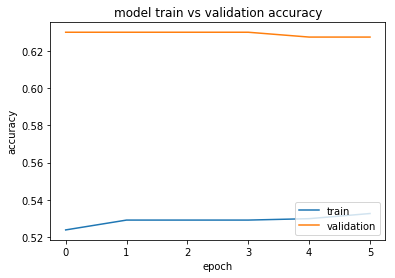

-------------------------------------------
Test LSTM Course BBB - 2 Target Classes - Decile0
Classification Report for LSTM predictions:
-------------------------------------------


C:\Users\chris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00       180
          1       0.27      0.01      0.01       391
          2       0.63      0.99      0.77       972

avg / total       0.47      0.63      0.49      1543

Fit LSTM Course BBB - 2 Target Classes - Decile1
Train on 3978 samples, validate on 1543 samples
Epoch 1/15
3978/3978 [==============================] - 14s 4ms/step - loss: 0.9619 - acc: 0.5271 - val_loss: 0.8989 - val_acc: 0.6299
Epoch 2/15
3978/3978 [==============================] - 12s 3ms/step - loss: 0.9210 - acc: 0.5641 - val_loss: 0.9180 - val_acc: 0.5528
Epoch 3/15
3978/3978 [==============================] - 13s 3ms/step - loss: 0.8712 - acc: 0.6101 - val_loss: 1.0155 - val_acc: 0.5055
Epoch 4/15
3978/3978 [==============================] - 13s 3ms/step - loss: 0.8541 - acc: 0.6232 - val_loss: 1.0953 - val_acc: 0.5049
Epoch 5/15
3978/3978 [==============================] - 13s 3ms/step - loss: 0.8501 - acc: 0.61

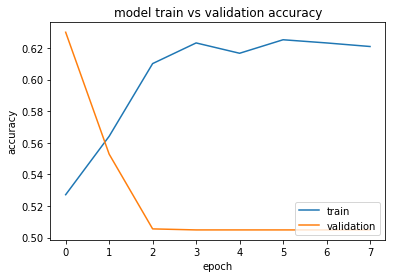

-------------------------------------------
Test LSTM Course BBB - 2 Target Classes - Decile1
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       180
          1       0.30      0.51      0.38       391
          2       0.66      0.60      0.63       972

avg / total       0.49      0.50      0.49      1543

Fit LSTM Course BBB - 2 Target Classes - Decile2
Train on 3978 samples, validate on 1543 samples
Epoch 1/15
3978/3978 [==============================] - 16s 4ms/step - loss: 0.9537 - acc: 0.5322 - val_loss: 0.8926 - val_acc: 0.5807
Epoch 2/15
3978/3978 [==============================] - 15s 4ms/step - loss: 0.8602 - acc: 0.6264 - val_loss: 1.0629 - val_acc: 0.5697
Epoch 3/15
3978/3978 [==============================] - 15s 4ms/step - loss: 0.8192 - acc: 0.6345 - val_loss: 1.1714 - val_acc: 0.5774
Epoch 4/15
3978/3978 [==========================

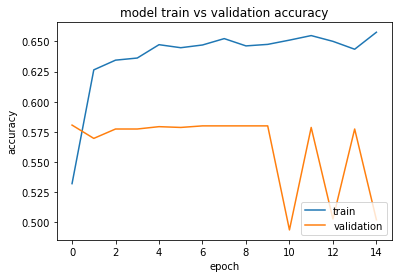

-------------------------------------------
Test LSTM Course BBB - 2 Target Classes - Decile2
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.18      0.23      0.20       180
          1       0.37      0.46      0.41       391
          2       0.67      0.57      0.62       972

avg / total       0.54      0.50      0.52      1543

Fit LSTM Course BBB - 2 Target Classes - Decile3
Train on 3978 samples, validate on 1543 samples
Epoch 1/15
3978/3978 [==============================] - 19s 5ms/step - loss: 0.9471 - acc: 0.5468 - val_loss: 0.9564 - val_acc: 0.5087
Epoch 2/15
3978/3978 [==============================] - 17s 4ms/step - loss: 0.8471 - acc: 0.6262 - val_loss: 0.9844 - val_acc: 0.5437
Epoch 3/15
3978/3978 [==============================] - 17s 4ms/step - loss: 0.8122 - acc: 0.6352 - val_loss: 1.1902 - val_acc: 0.5094
Epoch 4/15
3978/3978 [==========================

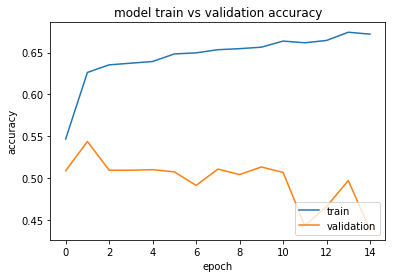

-------------------------------------------
Test LSTM Course BBB - 2 Target Classes - Decile3
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.18      0.22      0.20       180
          1       0.31      0.52      0.39       391
          2       0.66      0.44      0.53       972

avg / total       0.51      0.44      0.45      1543

Fit LSTM Course BBB - 2 Target Classes - Decile4
Train on 3978 samples, validate on 1543 samples
Epoch 1/15
3978/3978 [==============================] - 23s 6ms/step - loss: 0.9260 - acc: 0.5661 - val_loss: 0.9122 - val_acc: 0.5211
Epoch 2/15
3978/3978 [==============================] - 19s 5ms/step - loss: 0.7887 - acc: 0.6606 - val_loss: 1.0844 - val_acc: 0.5191
Epoch 3/15
3978/3978 [==============================] - 20s 5ms/step - loss: 0.7545 - acc: 0.6709 - val_loss: 1.1871 - val_acc: 0.5172
Epoch 4/15
3978/3978 [==========================

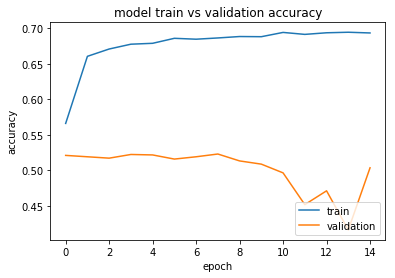

-------------------------------------------
Test LSTM Course BBB - 2 Target Classes - Decile4
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.17      0.03      0.06       180
          1       0.32      0.56      0.41       391
          2       0.67      0.57      0.61       972

avg / total       0.52      0.50      0.50      1543

Fit LSTM Course BBB - 2 Target Classes - Decile5
Train on 3978 samples, validate on 1543 samples
Epoch 1/15
3978/3978 [==============================] - 23s 6ms/step - loss: 0.9333 - acc: 0.5644 - val_loss: 0.9376 - val_acc: 0.5185
Epoch 2/15
3978/3978 [==============================] - 20s 5ms/step - loss: 0.7808 - acc: 0.6556 - val_loss: 0.9589 - val_acc: 0.5528
Epoch 3/15
3978/3978 [==============================] - 21s 5ms/step - loss: 0.7528 - acc: 0.6662 - val_loss: 1.0637 - val_acc: 0.5250
Epoch 4/15
3978/3978 [==========================

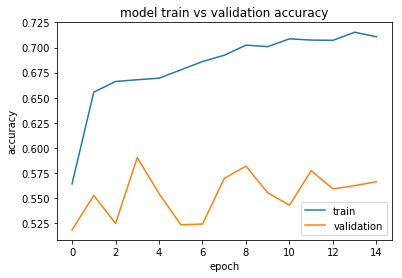

-------------------------------------------
Test LSTM Course BBB - 2 Target Classes - Decile5
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       180
          1       0.39      0.69      0.50       391
          2       0.71      0.62      0.66       972

avg / total       0.55      0.57      0.54      1543

Fit LSTM Course BBB - 2 Target Classes - Decile6
Train on 3978 samples, validate on 1543 samples
Epoch 1/15
3978/3978 [==============================] - 25s 6ms/step - loss: 0.9085 - acc: 0.5855 - val_loss: 0.7782 - val_acc: 0.6999
Epoch 2/15
3978/3978 [==============================] - 23s 6ms/step - loss: 0.7494 - acc: 0.6767 - val_loss: 0.8516 - val_acc: 0.6604
Epoch 3/15
3978/3978 [==============================] - 23s 6ms/step - loss: 0.7192 - acc: 0.6931 - val_loss: 0.8367 - val_acc: 0.6909
Epoch 4/15
3978/3978 [==========================

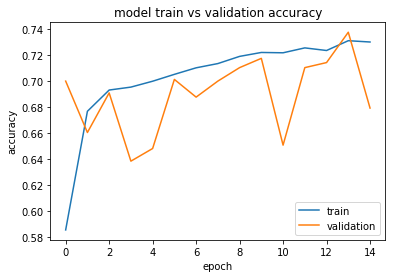

-------------------------------------------
Test LSTM Course BBB - 2 Target Classes - Decile6
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.42      0.21      0.28       180
          1       0.56      0.73      0.64       391
          2       0.76      0.74      0.75       972

avg / total       0.67      0.68      0.67      1543

Fit LSTM Course BBB - 2 Target Classes - Decile7
Train on 3978 samples, validate on 1543 samples
Epoch 1/15
3978/3978 [==============================] - 29s 7ms/step - loss: 0.8888 - acc: 0.5948 - val_loss: 0.7817 - val_acc: 0.6332
Epoch 2/15
3978/3978 [==============================] - 27s 7ms/step - loss: 0.7092 - acc: 0.7109 - val_loss: 0.7815 - val_acc: 0.6371
Epoch 3/15
3978/3978 [==============================] - 25s 6ms/step - loss: 0.6799 - acc: 0.7255 - val_loss: 0.8041 - val_acc: 0.6073
Epoch 4/15
3978/3978 [==========================

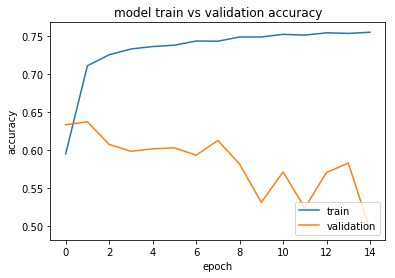

-------------------------------------------
Test LSTM Course BBB - 2 Target Classes - Decile7
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.50      0.01      0.02       180
          1       0.36      0.91      0.52       391
          2       0.73      0.42      0.53       972

avg / total       0.61      0.49      0.47      1543

Fit LSTM Course BBB - 2 Target Classes - Decile8
Train on 3978 samples, validate on 1543 samples
Epoch 1/15
3978/3978 [==============================] - 29s 7ms/step - loss: 0.8863 - acc: 0.6018 - val_loss: 0.7260 - val_acc: 0.7174
Epoch 2/15
3978/3978 [==============================] - 27s 7ms/step - loss: 0.7045 - acc: 0.7102 - val_loss: 0.7046 - val_acc: 0.7032
Epoch 3/15
3978/3978 [==============================] - 27s 7ms/step - loss: 0.6804 - acc: 0.7222 - val_loss: 0.6871 - val_acc: 0.7129
Epoch 4/15
3978/3978 [==========================

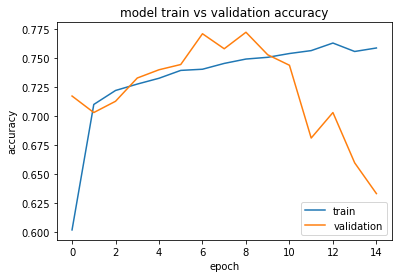

-------------------------------------------
Test LSTM Course BBB - 2 Target Classes - Decile8
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       180
          1       0.48      0.84      0.61       391
          2       0.75      0.67      0.71       972

avg / total       0.60      0.63      0.60      1543

Fit LSTM Course BBB - 2 Target Classes - Decile9
Train on 3978 samples, validate on 1543 samples
Epoch 1/15
3978/3978 [==============================] - 33s 8ms/step - loss: 0.8851 - acc: 0.5945 - val_loss: 0.7761 - val_acc: 0.6261
Epoch 2/15
3978/3978 [==============================] - 29s 7ms/step - loss: 0.6797 - acc: 0.7157 - val_loss: 0.7728 - val_acc: 0.6157
Epoch 3/15
3978/3978 [==============================] - 29s 7ms/step - loss: 0.6505 - acc: 0.7330 - val_loss: 0.6759 - val_acc: 0.7064
Epoch 4/15
3978/3978 [==========================

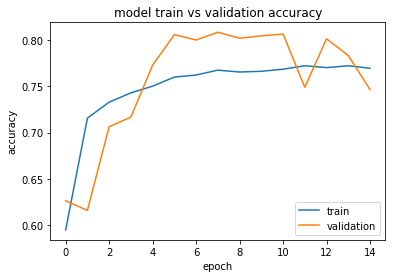

-------------------------------------------
Test LSTM Course BBB - 2 Target Classes - Decile9
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.57      0.02      0.04       180
          1       0.70      0.81      0.75       391
          2       0.77      0.86      0.81       972

avg / total       0.73      0.75      0.70      1543

Fit LSTM Course BBB - 2 Target Classes - Decile10
Train on 3978 samples, validate on 1543 samples
Epoch 1/15
3978/3978 [==============================] - 33s 8ms/step - loss: 0.8881 - acc: 0.5882 - val_loss: 0.7641 - val_acc: 0.6948
Epoch 2/15
3978/3978 [==============================] - 31s 8ms/step - loss: 0.6752 - acc: 0.7157 - val_loss: 0.7458 - val_acc: 0.6753
Epoch 3/15
3978/3978 [==============================] - 31s 8ms/step - loss: 0.6458 - acc: 0.7293 - val_loss: 0.7522 - val_acc: 0.6643
Epoch 4/15
3978/3978 [=========================

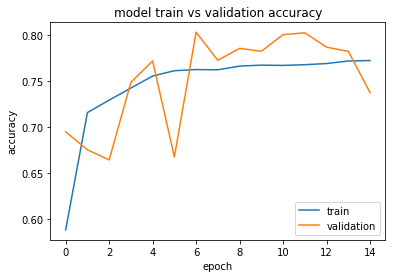

-------------------------------------------
Test LSTM Course BBB - 2 Target Classes - Decile10
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       180
          1       0.68      0.82      0.74       391
          2       0.76      0.84      0.80       972

avg / total       0.65      0.74      0.69      1543



In [31]:
for i in Deciles:
    
    # Build model for each timestep

    BBB_model_names[i] = Sequential()
    BBB_model_names[i].add(LSTM(32, input_shape=(i+1,3) , activation='sigmoid'))
    BBB_model_names[i].add(Dense(3, activation='sigmoid'))
    BBB_model_names[i].compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Fit model for each timestep
    ES = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=0, verbose=0, mode='auto')
    print('Fit LSTM Course BBB - 2 Target Classes - Decile' + str(i))
    history = BBB_model_names[i].fit(BBB_Train_set[i], BBB_Train_Targets_1HE, epochs=15, batch_size=1, verbose=1,
                                    validation_data = (BBB_Test_set[i], BBB_Test_Targets_1HE), callbacks = [ES])
    
    # plot train vs validation accuracy
    pyplot.plot(history.history['acc'])
    pyplot.plot(history.history['val_acc'])
    pyplot.title('model train vs validation accuracy')
    pyplot.ylabel('accuracy')
    pyplot.xlabel('epoch')
    pyplot.legend(['train', 'validation'], loc='lower right')
    pyplot.show()
    
    # Test model for each timestep
    print('-------------------------------------------')
    print('Test LSTM Course BBB - 2 Target Classes - Decile' + str(i))
    print('Classification Report for LSTM predictions:')
    print('-------------------------------------------')
    print(classification_report(y_pred=BBB_model_names[i].predict_classes(BBB_Test_set[i]), y_true=BBB_Test_Targets_1D))
    print("Accuracy score: " + str(accuracy_score(y_pred=BBB_model_names[i].predict_classes(BBB_Test_set[i]), y_true=BBB_Test_Targets_1D)))

### DDD Course

In [32]:
Deciles = np.arange(11)
DDD_model_names = ["modelDDD0", "modelDDD1", "modelDDD2", "modelDDD3", "modelDDD4", "modelDDD5",
                   "modelDDD6", "modelDDD7", "modelDDD8", "modelDDD9", "modelDDD10"]
DDD_names = ["DDD0", "DDD1", "DDD2", "DDD3", "DDD4", "DDD5", "DDD6", "DDD7", "DDD8", "DDD9", "DDD10"]
DDD_Train_set = [DDD_Train_3D_Decile0,DDD_Train_3D_Decile1,DDD_Train_3D_Decile2,DDD_Train_3D_Decile3,DDD_Train_3D_Decile4,
                 DDD_Train_3D_Decile5,DDD_Train_3D_Decile6,DDD_Train_3D_Decile7,DDD_Train_3D_Decile8,DDD_Train_3D_Decile9,
                 DDD_Train_3D]
DDD_Test_set = [DDD_Test_3D_Decile0,DDD_Test_3D_Decile1,DDD_Test_3D_Decile2,DDD_Test_3D_Decile3,DDD_Test_3D_Decile4,
                 DDD_Test_3D_Decile5,DDD_Test_3D_Decile6,DDD_Test_3D_Decile7,DDD_Test_3D_Decile8,DDD_Test_3D_Decile9,
                 DDD_Test_3D]

Fit LSTM Course DDD - 2 Target Classes - Decile0
Train on 2866 samples, validate on 1156 samples
Epoch 1/15
2866/2866 [==============================] - 3s 1ms/step - loss: 1.0024 - acc: 0.5398 - val_loss: 0.9392 - val_acc: 0.5882
Epoch 2/15
2866/2866 [==============================] - 0s 104us/step - loss: 0.9364 - acc: 0.5398 - val_loss: 0.9130 - val_acc: 0.5882
Epoch 3/15
2866/2866 [==============================] - 0s 99us/step - loss: 0.9257 - acc: 0.5398 - val_loss: 0.9099 - val_acc: 0.5882
Epoch 4/15
2866/2866 [==============================] - 0s 105us/step - loss: 0.9238 - acc: 0.5398 - val_loss: 0.9062 - val_acc: 0.5882
Epoch 5/15
2866/2866 [==============================] - 0s 98us/step - loss: 0.9238 - acc: 0.5398 - val_loss: 0.9066 - val_acc: 0.5882


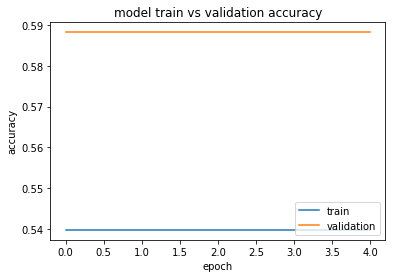

-------------------------------------------
Test LSTM Course DDD - 2 Target Classes - Decile0
Classification Report for LSTM predictions:
-------------------------------------------


C:\Users\chris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00       112
          1       0.00      0.00      0.00       364
          2       0.59      1.00      0.74       680

avg / total       0.35      0.59      0.44      1156

Fit LSTM Course DDD - 2 Target Classes - Decile1
Train on 2866 samples, validate on 1156 samples
Epoch 1/15
2866/2866 [==============================] - 3s 1ms/step - loss: 1.0189 - acc: 0.4899 - val_loss: 0.9255 - val_acc: 0.5882
Epoch 2/15
2866/2866 [==============================] - 0s 111us/step - loss: 0.9262 - acc: 0.5398 - val_loss: 0.9062 - val_acc: 0.5882
Epoch 3/15
2866/2866 [==============================] - 0s 114us/step - loss: 0.9204 - acc: 0.5398 - val_loss: 0.9030 - val_acc: 0.5882
Epoch 4/15
2866/2866 [==============================] - 0s 107us/step - loss: 0.9181 - acc: 0.5398 - val_loss: 0.9011 - val_acc: 0.5882
Epoch 5/15
2866/2866 [==============================] - 0s 110us/step - loss: 0.9155 - acc: 0

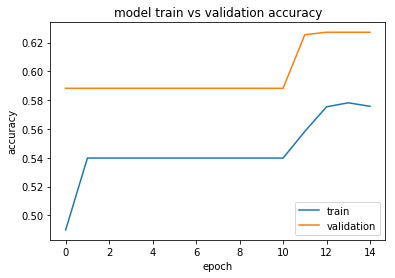

-------------------------------------------
Test LSTM Course DDD - 2 Target Classes - Decile1
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       112
          1       0.87      0.14      0.25       364
          2       0.61      0.99      0.76       680

avg / total       0.63      0.63      0.52      1156

Fit LSTM Course DDD - 2 Target Classes - Decile2
Train on 2866 samples, validate on 1156 samples
Epoch 1/15
2866/2866 [==============================] - 3s 1ms/step - loss: 1.0364 - acc: 0.4435 - val_loss: 0.9365 - val_acc: 0.5882
Epoch 2/15
2866/2866 [==============================] - 0s 129us/step - loss: 0.9269 - acc: 0.5398 - val_loss: 0.9066 - val_acc: 0.5882
Epoch 3/15
2866/2866 [==============================] - 0s 134us/step - loss: 0.9211 - acc: 0.5398 - val_loss: 0.9021 - val_acc: 0.5882
Epoch 4/15
2866/2866 [=========================

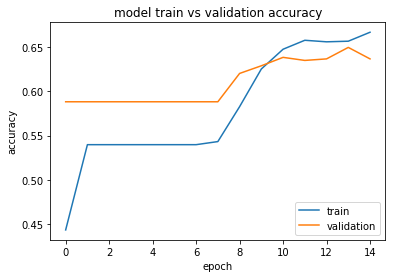

-------------------------------------------
Test LSTM Course DDD - 2 Target Classes - Decile2
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       112
          1       0.92      0.17      0.28       364
          2       0.62      0.99      0.76       680

avg / total       0.66      0.64      0.54      1156

Fit LSTM Course DDD - 2 Target Classes - Decile3
Train on 2866 samples, validate on 1156 samples
Epoch 1/15
2866/2866 [==============================] - 4s 1ms/step - loss: 1.0087 - acc: 0.4930 - val_loss: 0.9132 - val_acc: 0.5882
Epoch 2/15
2866/2866 [==============================] - 0s 142us/step - loss: 0.9249 - acc: 0.5398 - val_loss: 0.9043 - val_acc: 0.5882
Epoch 3/15
2866/2866 [==============================] - 0s 145us/step - loss: 0.9204 - acc: 0.5398 - val_loss: 0.9034 - val_acc: 0.5882
Epoch 4/15
2866/2866 [=========================

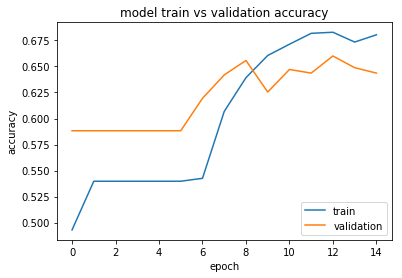

-------------------------------------------
Test LSTM Course DDD - 2 Target Classes - Decile3
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       112
          1       0.90      0.20      0.32       364
          2       0.62      0.99      0.77       680

avg / total       0.65      0.64      0.55      1156

Fit LSTM Course DDD - 2 Target Classes - Decile4
Train on 2866 samples, validate on 1156 samples
Epoch 1/15
2866/2866 [==============================] - 4s 1ms/step - loss: 1.0249 - acc: 0.4295 - val_loss: 0.9112 - val_acc: 0.5882
Epoch 2/15
2866/2866 [==============================] - 0s 157us/step - loss: 0.9205 - acc: 0.5398 - val_loss: 0.9071 - val_acc: 0.5882
Epoch 3/15
2866/2866 [==============================] - 0s 157us/step - loss: 0.9148 - acc: 0.5398 - val_loss: 0.8992 - val_acc: 0.5882
Epoch 4/15
2866/2866 [=========================

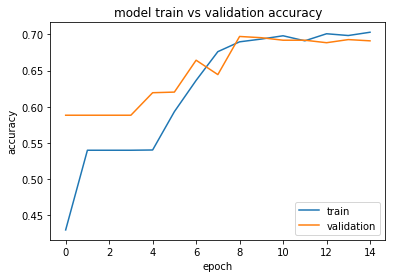

-------------------------------------------
Test LSTM Course DDD - 2 Target Classes - Decile4
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       112
          1       0.84      0.40      0.54       364
          2       0.66      0.96      0.79       680

avg / total       0.66      0.69      0.63      1156

Fit LSTM Course DDD - 2 Target Classes - Decile5
Train on 2866 samples, validate on 1156 samples
Epoch 1/15
2866/2866 [==============================] - 4s 1ms/step - loss: 0.9833 - acc: 0.5115 - val_loss: 0.9054 - val_acc: 0.5882
Epoch 2/15
2866/2866 [==============================] - 0s 169us/step - loss: 0.9204 - acc: 0.5398 - val_loss: 0.9023 - val_acc: 0.5882
Epoch 3/15
2866/2866 [==============================] - 0s 169us/step - loss: 0.9152 - acc: 0.5398 - val_loss: 0.9021 - val_acc: 0.5882
Epoch 4/15
2866/2866 [=========================

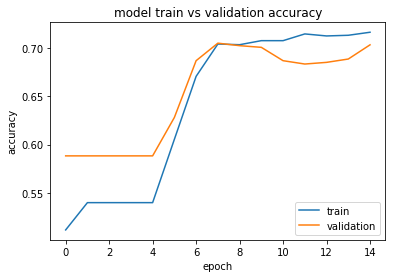

-------------------------------------------
Test LSTM Course DDD - 2 Target Classes - Decile5
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       112
          1       0.83      0.46      0.59       364
          2       0.68      0.95      0.79       680

avg / total       0.66      0.70      0.65      1156

Fit LSTM Course DDD - 2 Target Classes - Decile6
Train on 2866 samples, validate on 1156 samples
Epoch 1/15
2866/2866 [==============================] - 4s 1ms/step - loss: 0.9632 - acc: 0.5398 - val_loss: 0.9087 - val_acc: 0.5882
Epoch 2/15
2866/2866 [==============================] - 1s 190us/step - loss: 0.9209 - acc: 0.5398 - val_loss: 0.9020 - val_acc: 0.5882
Epoch 3/15
2866/2866 [==============================] - 1s 185us/step - loss: 0.9139 - acc: 0.5398 - val_loss: 0.8973 - val_acc: 0.5882
Epoch 4/15
2866/2866 [=========================

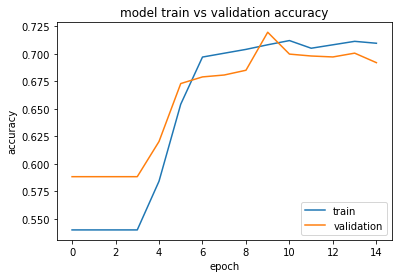

-------------------------------------------
Test LSTM Course DDD - 2 Target Classes - Decile6
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       112
          1       0.88      0.38      0.53       364
          2       0.66      0.97      0.79       680

avg / total       0.67      0.69      0.63      1156

Fit LSTM Course DDD - 2 Target Classes - Decile7
Train on 2866 samples, validate on 1156 samples
Epoch 1/15
2866/2866 [==============================] - 4s 1ms/step - loss: 0.9359 - acc: 0.5398 - val_loss: 0.9063 - val_acc: 0.5882
Epoch 2/15
2866/2866 [==============================] - 1s 205us/step - loss: 0.9176 - acc: 0.5398 - val_loss: 0.9008 - val_acc: 0.5882
Epoch 3/15
2866/2866 [==============================] - 1s 201us/step - loss: 0.9089 - acc: 0.5398 - val_loss: 0.8951 - val_acc: 0.5882
Epoch 4/15
2866/2866 [=========================

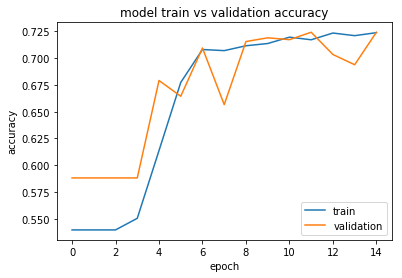

-------------------------------------------
Test LSTM Course DDD - 2 Target Classes - Decile7
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       112
          1       0.82      0.55      0.66       364
          2       0.70      0.93      0.80       680

avg / total       0.67      0.72      0.68      1156

Fit LSTM Course DDD - 2 Target Classes - Decile8
Train on 2866 samples, validate on 1156 samples
Epoch 1/15
2866/2866 [==============================] - 4s 1ms/step - loss: 0.9600 - acc: 0.5398 - val_loss: 0.9050 - val_acc: 0.5882
Epoch 2/15
2866/2866 [==============================] - 1s 223us/step - loss: 0.9193 - acc: 0.5398 - val_loss: 0.9027 - val_acc: 0.5882
Epoch 3/15
2866/2866 [==============================] - 1s 222us/step - loss: 0.9147 - acc: 0.5398 - val_loss: 0.8927 - val_acc: 0.5882
Epoch 4/15
2866/2866 [=========================

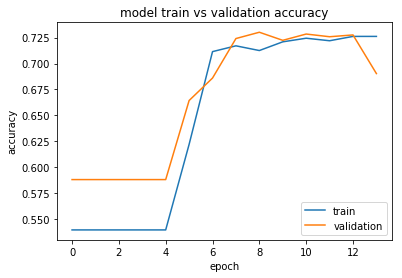

-------------------------------------------
Test LSTM Course DDD - 2 Target Classes - Decile8
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       112
          1       0.93      0.35      0.51       364
          2       0.66      0.99      0.79       680

avg / total       0.68      0.69      0.62      1156

Fit LSTM Course DDD - 2 Target Classes - Decile9
Train on 2866 samples, validate on 1156 samples
Epoch 1/15
2866/2866 [==============================] - 4s 1ms/step - loss: 0.9398 - acc: 0.4958 - val_loss: 0.9061 - val_acc: 0.5882
Epoch 2/15
2866/2866 [==============================] - 1s 231us/step - loss: 0.9209 - acc: 0.5398 - val_loss: 0.9041 - val_acc: 0.5882
Epoch 3/15
2866/2866 [==============================] - 1s 239us/step - loss: 0.9148 - acc: 0.5398 - val_loss: 0.8964 - val_acc: 0.5882
Epoch 4/15
2866/2866 [=========================

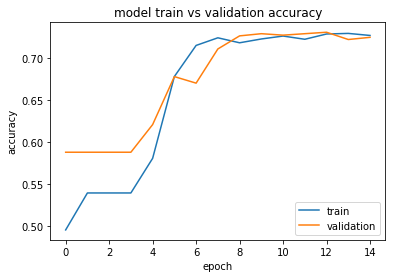

-------------------------------------------
Test LSTM Course DDD - 2 Target Classes - Decile9
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       112
          1       0.85      0.52      0.65       364
          2       0.69      0.95      0.80       680

avg / total       0.68      0.72      0.68      1156

Fit LSTM Course DDD - 2 Target Classes - Decile10
Train on 2866 samples, validate on 1156 samples
Epoch 1/15
2866/2866 [==============================] - 4s 2ms/step - loss: 0.9483 - acc: 0.5398 - val_loss: 0.8996 - val_acc: 0.5882
Epoch 2/15
2866/2866 [==============================] - 1s 246us/step - loss: 0.9116 - acc: 0.5398 - val_loss: 0.8921 - val_acc: 0.5882
Epoch 3/15
2866/2866 [==============================] - 1s 242us/step - loss: 0.8962 - acc: 0.5454 - val_loss: 0.8748 - val_acc: 0.5882
Epoch 4/15
2866/2866 [========================

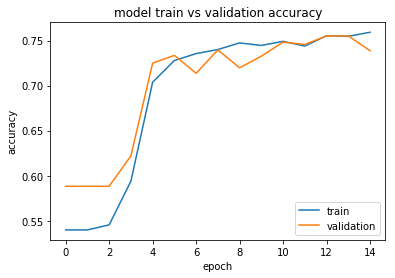

-------------------------------------------
Test LSTM Course DDD - 2 Target Classes - Decile10
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       112
          1       0.87      0.56      0.68       364
          2       0.70      0.96      0.81       680

avg / total       0.69      0.74      0.69      1156



In [33]:
for i in Deciles:
    
    # Build model for each timestep

    DDD_model_names[i] = Sequential()
    DDD_model_names[i].add(LSTM(32, input_shape=(i+1,3) , activation='sigmoid'))
    DDD_model_names[i].add(Dense(3, activation='sigmoid'))
    DDD_model_names[i].compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Fit model for each timestep
    ES = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=0, verbose=0, mode='auto')
    print('Fit LSTM Course DDD - 2 Target Classes - Decile' + str(i))
    history = DDD_model_names[i].fit(DDD_Train_set[i], DDD_Train_Targets_1HE, epochs=15, batch_size=32, verbose=1,
                                    validation_data = (DDD_Test_set[i], DDD_Test_Targets_1HE), callbacks = [ES])
    
    # plot train vs validation accuracy
    pyplot.plot(history.history['acc'])
    pyplot.plot(history.history['val_acc'])
    pyplot.title('model train vs validation accuracy')
    pyplot.ylabel('accuracy')
    pyplot.xlabel('epoch')
    pyplot.legend(['train', 'validation'], loc='lower right')
    pyplot.show()
    
    # Test model for each timestep
    print('-------------------------------------------')
    print('Test LSTM Course DDD - 2 Target Classes - Decile' + str(i))
    print('Classification Report for LSTM predictions:')
    print('-------------------------------------------')
    print(classification_report(y_pred=DDD_model_names[i].predict_classes(DDD_Test_set[i]), y_true=DDD_Test_Targets_1D))
    print("Accuracy score: " + str(accuracy_score(y_pred=DDD_model_names[i].predict_classes(DDD_Test_set[i]), y_true=DDD_Test_Targets_1D)))

### FFF Course

In [35]:
Deciles = np.arange(11)
FFF_model_names = ["modelFFF0", "modelFFF1", "modelFFF2", "modelFFF3", "modelFFF4", "modelFFF5",
                   "modelFFF6", "modelFFF7", "modelFFF8", "modelFFF9", "modelFFF10"]
FFF_names = ["FFF0", "FFF1", "FFF2", "FFF3", "FFF4", "FFF5", "FFF6", "FFF7", "FFF8", "FFF9", "FFF10"]
FFF_Train_set = [FFF_Train_3D_Decile0,FFF_Train_3D_Decile1,FFF_Train_3D_Decile2,FFF_Train_3D_Decile3,FFF_Train_3D_Decile4,
                 FFF_Train_3D_Decile5,FFF_Train_3D_Decile6,FFF_Train_3D_Decile7,FFF_Train_3D_Decile8,FFF_Train_3D_Decile9,
                 FFF_Train_3D]
FFF_Test_set = [FFF_Test_3D_Decile0,FFF_Test_3D_Decile1,FFF_Test_3D_Decile2,FFF_Test_3D_Decile3,FFF_Test_3D_Decile4,
                 FFF_Test_3D_Decile5,FFF_Test_3D_Decile6,FFF_Test_3D_Decile7,FFF_Test_3D_Decile8,FFF_Test_3D_Decile9,
                 FFF_Test_3D]

Fit LSTM Course FFF - 2 Target Classes - Decile0
Train on 3849 samples, validate on 1510 samples
Epoch 1/15
3849/3849 [==============================] - 16s 4ms/step - loss: 0.9413 - acc: 0.5505 - val_loss: 0.9984 - val_acc: 0.5689
Epoch 2/15
3849/3849 [==============================] - 12s 3ms/step - loss: 0.9362 - acc: 0.5505 - val_loss: 1.0069 - val_acc: 0.5689
Epoch 3/15
3849/3849 [==============================] - 12s 3ms/step - loss: 0.9361 - acc: 0.5505 - val_loss: 1.0049 - val_acc: 0.5689
Epoch 4/15
3849/3849 [==============================] - 14s 4ms/step - loss: 0.9360 - acc: 0.5505 - val_loss: 0.9939 - val_acc: 0.5689
Epoch 5/15
3849/3849 [==============================] - 12s 3ms/step - loss: 0.9360 - acc: 0.5505 - val_loss: 0.9965 - val_acc: 0.5689


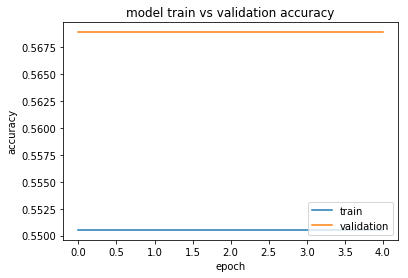

-------------------------------------------
Test LSTM Course FFF - 2 Target Classes - Decile0
Classification Report for LSTM predictions:
-------------------------------------------


C:\Users\chris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00       258
          1       0.00      0.00      0.00       393
          2       0.57      1.00      0.73       859

avg / total       0.32      0.57      0.41      1510

Fit LSTM Course FFF - 2 Target Classes - Decile1
Train on 3849 samples, validate on 1510 samples
Epoch 1/15
3849/3849 [==============================] - 17s 5ms/step - loss: 0.9306 - acc: 0.5505 - val_loss: 0.9972 - val_acc: 0.5689
Epoch 2/15
3849/3849 [==============================] - 13s 3ms/step - loss: 0.8954 - acc: 0.5737 - val_loss: 0.9361 - val_acc: 0.5649
Epoch 3/15
3849/3849 [==============================] - 13s 3ms/step - loss: 0.8722 - acc: 0.5981 - val_loss: 0.9166 - val_acc: 0.5649
Epoch 4/15
3849/3849 [==============================] - 13s 3ms/step - loss: 0.8621 - acc: 0.5952 - val_loss: 0.9194 - val_acc: 0.5636
Epoch 5/15
3849/3849 [==============================] - 13s 3ms/step - loss: 0.8558 - acc: 0.60

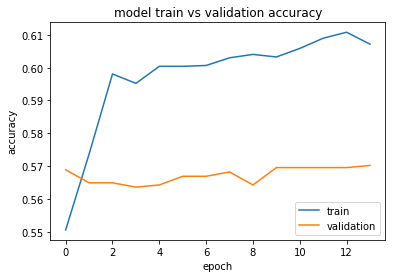

-------------------------------------------
Test LSTM Course FFF - 2 Target Classes - Decile1
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       258
          1       0.48      0.45      0.46       393
          2       0.60      0.80      0.69       859

avg / total       0.47      0.57      0.51      1510

Fit LSTM Course FFF - 2 Target Classes - Decile2
Train on 3849 samples, validate on 1510 samples
Epoch 1/15
3849/3849 [==============================] - 19s 5ms/step - loss: 0.9277 - acc: 0.5492 - val_loss: 0.9610 - val_acc: 0.5689
Epoch 2/15
3849/3849 [==============================] - 16s 4ms/step - loss: 0.8449 - acc: 0.6215 - val_loss: 0.8796 - val_acc: 0.6225
Epoch 3/15
3849/3849 [==============================] - 16s 4ms/step - loss: 0.7958 - acc: 0.6339 - val_loss: 0.8619 - val_acc: 0.5815
Epoch 4/15
3849/3849 [==========================

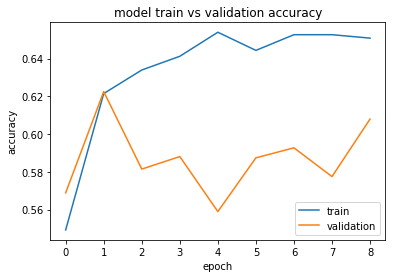

-------------------------------------------
Test LSTM Course FFF - 2 Target Classes - Decile2
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.50      0.00      0.01       258
          1       0.59      0.46      0.52       393
          2       0.61      0.86      0.71       859

avg / total       0.59      0.61      0.54      1510

Fit LSTM Course FFF - 2 Target Classes - Decile3
Train on 3849 samples, validate on 1510 samples
Epoch 1/15
3849/3849 [==============================] - 21s 5ms/step - loss: 0.9151 - acc: 0.5588 - val_loss: 0.9026 - val_acc: 0.6113
Epoch 2/15
3849/3849 [==============================] - 17s 4ms/step - loss: 0.7913 - acc: 0.6464 - val_loss: 0.8830 - val_acc: 0.5656
Epoch 3/15
3849/3849 [==============================] - 19s 5ms/step - loss: 0.7570 - acc: 0.6490 - val_loss: 0.8042 - val_acc: 0.6252
Epoch 4/15
3849/3849 [==========================

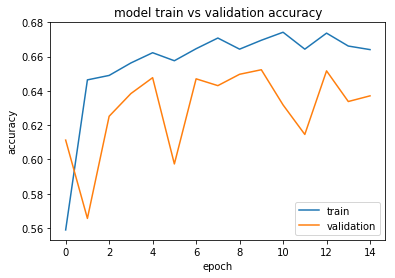

-------------------------------------------
Test LSTM Course FFF - 2 Target Classes - Decile3
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       258
          1       0.63      0.61      0.62       393
          2       0.64      0.84      0.72       859

avg / total       0.53      0.64      0.57      1510

Fit LSTM Course FFF - 2 Target Classes - Decile4
Train on 3849 samples, validate on 1510 samples
Epoch 1/15
3849/3849 [==============================] - 24s 6ms/step - loss: 0.9061 - acc: 0.5656 - val_loss: 0.8621 - val_acc: 0.5993
Epoch 2/15
3849/3849 [==============================] - 20s 5ms/step - loss: 0.7583 - acc: 0.6576 - val_loss: 0.8020 - val_acc: 0.6232
Epoch 3/15
3849/3849 [==============================] - 20s 5ms/step - loss: 0.7288 - acc: 0.6654 - val_loss: 0.9853 - val_acc: 0.5371
Epoch 4/15
3849/3849 [==========================

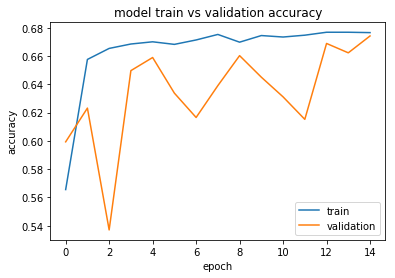

-------------------------------------------
Test LSTM Course FFF - 2 Target Classes - Decile4
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.82      0.07      0.13       258
          1       0.76      0.54      0.63       393
          2       0.65      0.92      0.76       859

avg / total       0.71      0.67      0.62      1510

Fit LSTM Course FFF - 2 Target Classes - Decile5
Train on 3849 samples, validate on 1510 samples
Epoch 1/15
3849/3849 [==============================] - 25s 7ms/step - loss: 0.8932 - acc: 0.5770 - val_loss: 0.8741 - val_acc: 0.5874
Epoch 2/15
3849/3849 [==============================] - 22s 6ms/step - loss: 0.7285 - acc: 0.6791 - val_loss: 0.7523 - val_acc: 0.6483
Epoch 3/15
3849/3849 [==============================] - 22s 6ms/step - loss: 0.6982 - acc: 0.6864 - val_loss: 0.7659 - val_acc: 0.6503
Epoch 4/15
3849/3849 [==========================

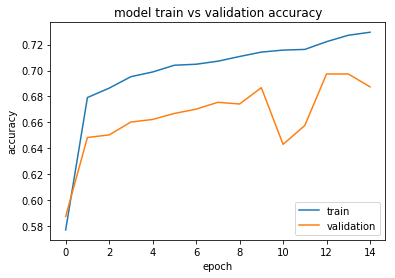

-------------------------------------------
Test LSTM Course FFF - 2 Target Classes - Decile5
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.90      0.07      0.14       258
          1       0.71      0.70      0.70       393
          2       0.68      0.86      0.76       859

avg / total       0.72      0.69      0.64      1510

Fit LSTM Course FFF - 2 Target Classes - Decile6
Train on 3849 samples, validate on 1510 samples
Epoch 1/15
3849/3849 [==============================] - 27s 7ms/step - loss: 0.8687 - acc: 0.5999 - val_loss: 0.7683 - val_acc: 0.6768
Epoch 2/15
3849/3849 [==============================] - 23s 6ms/step - loss: 0.6818 - acc: 0.7010 - val_loss: 0.7364 - val_acc: 0.6821
Epoch 3/15
3849/3849 [==============================] - 23s 6ms/step - loss: 0.6490 - acc: 0.7184 - val_loss: 0.6639 - val_acc: 0.6967
Epoch 4/15
3849/3849 [==========================

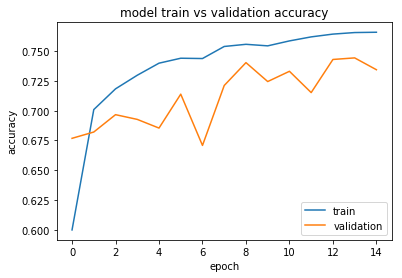

-------------------------------------------
Test LSTM Course FFF - 2 Target Classes - Decile6
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.79      0.13      0.23       258
          1       0.89      0.65      0.75       393
          2       0.69      0.95      0.80       859

avg / total       0.76      0.73      0.69      1510

Fit LSTM Course FFF - 2 Target Classes - Decile7
Train on 3849 samples, validate on 1510 samples
Epoch 1/15
3849/3849 [==============================] - 29s 7ms/step - loss: 0.8736 - acc: 0.5874 - val_loss: 0.7603 - val_acc: 0.6775
Epoch 2/15
3849/3849 [==============================] - 25s 7ms/step - loss: 0.6763 - acc: 0.7090 - val_loss: 0.7134 - val_acc: 0.6801
Epoch 3/15
3849/3849 [==============================] - 25s 6ms/step - loss: 0.6492 - acc: 0.7101 - val_loss: 0.6723 - val_acc: 0.6834
Epoch 4/15
3849/3849 [==========================

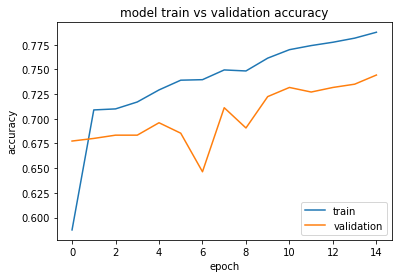

-------------------------------------------
Test LSTM Course FFF - 2 Target Classes - Decile7
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.79      0.22      0.35       258
          1       0.80      0.75      0.77       393
          2       0.72      0.90      0.80       859

avg / total       0.75      0.74      0.72      1510

Fit LSTM Course FFF - 2 Target Classes - Decile8
Train on 3849 samples, validate on 1510 samples
Epoch 1/15
3849/3849 [==============================] - 31s 8ms/step - loss: 0.8528 - acc: 0.6041 - val_loss: 0.7513 - val_acc: 0.6828
Epoch 2/15
3849/3849 [==============================] - 27s 7ms/step - loss: 0.6384 - acc: 0.7347 - val_loss: 0.8366 - val_acc: 0.6623
Epoch 3/15
3849/3849 [==============================] - 27s 7ms/step - loss: 0.6126 - acc: 0.7441 - val_loss: 0.8046 - val_acc: 0.6338
Epoch 4/15
3849/3849 [==========================

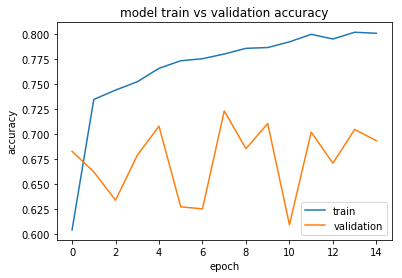

-------------------------------------------
Test LSTM Course FFF - 2 Target Classes - Decile8
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.75      0.36      0.49       258
          1       0.61      0.87      0.72       393
          2       0.74      0.71      0.73       859

avg / total       0.71      0.69      0.68      1510

Fit LSTM Course FFF - 2 Target Classes - Decile9
Train on 3849 samples, validate on 1510 samples
Epoch 1/15
3849/3849 [==============================] - 33s 9ms/step - loss: 0.8283 - acc: 0.6256 - val_loss: 0.6812 - val_acc: 0.7106
Epoch 2/15
3849/3849 [==============================] - 29s 8ms/step - loss: 0.6174 - acc: 0.7397 - val_loss: 0.6367 - val_acc: 0.7185
Epoch 3/15
3849/3849 [==============================] - 29s 8ms/step - loss: 0.5877 - acc: 0.7514 - val_loss: 0.6021 - val_acc: 0.7272
Epoch 4/15
3849/3849 [==========================

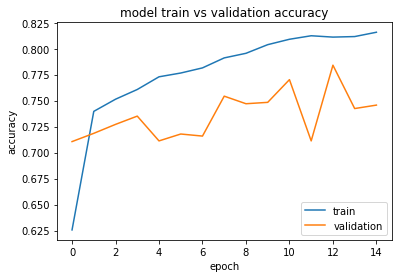

-------------------------------------------
Test LSTM Course FFF - 2 Target Classes - Decile9
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.86      0.19      0.31       258
          1       0.74      0.89      0.81       393
          2       0.74      0.85      0.79       859

avg / total       0.76      0.75      0.71      1510

Fit LSTM Course FFF - 2 Target Classes - Decile10
Train on 3849 samples, validate on 1510 samples
Epoch 1/15
3849/3849 [==============================] - 35s 9ms/step - loss: 0.8143 - acc: 0.6235 - val_loss: 0.6569 - val_acc: 0.7298
Epoch 2/15
3849/3849 [==============================] - 31s 8ms/step - loss: 0.5603 - acc: 0.7776 - val_loss: 0.5746 - val_acc: 0.7517
Epoch 3/15
3849/3849 [==============================] - 31s 8ms/step - loss: 0.5315 - acc: 0.7836 - val_loss: 0.5616 - val_acc: 0.7510
Epoch 4/15
3849/3849 [=========================

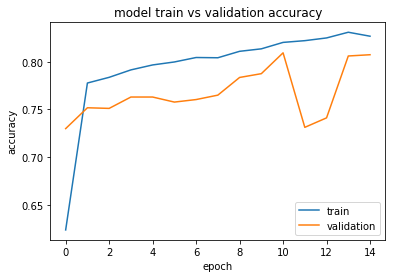

-------------------------------------------
Test LSTM Course FFF - 2 Target Classes - Decile10
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.60      0.74      0.67       258
          1       0.93      0.81      0.86       393
          2       0.84      0.83      0.83       859

avg / total       0.82      0.81      0.81      1510



In [36]:
for i in Deciles:
    
    # Build model for each timestep

    FFF_model_names[i] = Sequential()
    FFF_model_names[i].add(LSTM(32, input_shape=(i+1,3) , activation='sigmoid'))
    FFF_model_names[i].add(Dense(3, activation='sigmoid'))
    FFF_model_names[i].compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Fit model for each timestep
    ES = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=0, verbose=0, mode='auto')
    print('Fit LSTM Course FFF - 2 Target Classes - Decile' + str(i))
    history = FFF_model_names[i].fit(FFF_Train_set[i], FFF_Train_Targets_1HE, epochs=15, batch_size=1, verbose=1,
                                    validation_data = (FFF_Test_set[i], FFF_Test_Targets_1HE), callbacks = [ES])
    
    # plot train vs validation accuracy
    pyplot.plot(history.history['acc'])
    pyplot.plot(history.history['val_acc'])
    pyplot.title('model train vs validation accuracy')
    pyplot.ylabel('accuracy')
    pyplot.xlabel('epoch')
    pyplot.legend(['train', 'validation'], loc='lower right')
    pyplot.show()
    
    # Test model for each timestep
    print('-------------------------------------------')
    print('Test LSTM Course FFF - 2 Target Classes - Decile' + str(i))
    print('Classification Report for LSTM predictions:')
    print('-------------------------------------------')
    print(classification_report(y_pred=FFF_model_names[i].predict_classes(FFF_Test_set[i]), y_true=FFF_Test_Targets_1D))
    print("Accuracy score: " + str(accuracy_score(y_pred=FFF_model_names[i].predict_classes(FFF_Test_set[i]), y_true=FFF_Test_Targets_1D)))

# Alternate approach: Model timesteps individually

In [79]:
model = Sequential()
model.add(LSTM(32, input_shape=(11,4) , activation='sigmoid'))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

NameError: name 'Input' is not defined

In [139]:
model = Model(inputs=[LSTM_input, auxiliary_input], outputs=main_output)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# LSTM Course BBB

### Train LSTM Course BBB

In [140]:
model.fit(x=[BBB_Train_3D,BBB_AUX_Train], y=BBB_Train_Targets_1HE, epochs=4, batch_size=1, verbose=1)

Epoch 1/4
3978/3978 [==============================] - 16s 4ms/step - loss: 0.9174
Epoch 2/4
3978/3978 [==============================] - 15s 4ms/step - loss: 0.8375
Epoch 3/4
3978/3978 [==============================] - 15s 4ms/step - loss: 0.8230
Epoch 4/4
3978/3978 [==============================] - 15s 4ms/step - loss: 0.8388


In [71]:
model.fit(x=BBB_Train_3D, y=BBB_Train_Targets_1HE, epochs=4, batch_size=1, verbose=1)

Epoch 1/4
3978/3978 [==============================] - 16s 4ms/step - loss: 0.7083 - acc: 0.6885
Epoch 2/4
3978/3978 [==============================] - 15s 4ms/step - loss: 0.5772 - acc: 0.7574
Epoch 3/4
3978/3978 [==============================] - 16s 4ms/step - loss: 0.5573 - acc: 0.7647
Epoch 4/4
3978/3978 [==============================] - 15s 4ms/step - loss: 0.5241 - acc: 0.7735


### Test LSTM Course BBB

In [141]:
model.predict_classes(BBB_Test_3D)

AttributeError: 'Model' object has no attribute 'predict_classes'

In [73]:
print('Course BBB - 3 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=model.predict_classes(BBB_Test_3D), y_true=BBB_Test_Targets_1D))


Course BBB - 3 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       180
          1       0.46      0.95      0.62       391
          2       0.75      0.56      0.64       972

avg / total       0.59      0.60      0.56      1543



C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# LSTM Course DDD

### Train LSTM Course DDD

In [74]:
model.fit(DDD_Train_3D, DDD_Train_Targets_1HE, epochs=4, batch_size=1, verbose=1)

Epoch 1/4
2866/2866 [==============================] - 11s 4ms/step - loss: 0.4674 - acc: 0.7994
Epoch 2/4
2866/2866 [==============================] - 11s 4ms/step - loss: 0.4334 - acc: 0.8172
Epoch 3/4
2866/2866 [==============================] - 10s 4ms/step - loss: 0.4189 - acc: 0.8241
Epoch 4/4
2866/2866 [==============================] - 10s 4ms/step - loss: 0.4065 - acc: 0.8238


### Test LSTM Course DDD

In [75]:
model.predict_classes(DDD_Test_3D)

array([2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 1, 1, 2,
       1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1, 2, 0, 1, 1,
       1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2,
       2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2,
       1, 1, 1, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1,

In [76]:
print('Course DDD - 3 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=model.predict_classes(DDD_Test_3D), y_true=DDD_Test_Targets_1D))


Course DDD - 3 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.73      0.20      0.31       112
          1       0.80      0.77      0.78       364
          2       0.78      0.89      0.83       680

avg / total       0.78      0.78      0.77      1156



# LSTM Course FFF

### Train LSTM Course FFF

In [77]:
model.fit(FFF_Train_3D, FFF_Train_Targets_1HE, epochs=4, batch_size=1, verbose=1)

Epoch 1/4
3849/3849 [==============================] - 14s 4ms/step - loss: 0.4201 - acc: 0.8210
Epoch 2/4
3849/3849 [==============================] - 14s 4ms/step - loss: 0.4037 - acc: 0.8231
Epoch 3/4
3849/3849 [==============================] - 15s 4ms/step - loss: 0.4019 - acc: 0.8272
Epoch 4/4
3849/3849 [==============================] - 15s 4ms/step - loss: 0.3942 - acc: 0.8257


### Test LSTM Course FFF

In [ ]:
model.predict_classes(FFF_Test_3D)

In [78]:
print('Course FFF - 3 Target Classes')
print('Classification Report for LSTM predictions:')
print('-------------------------------------------')
print(classification_report(y_pred=model.predict_classes(FFF_Test_3D), y_true=FFF_Test_Targets_1D))


Course FFF - 3 Target Classes
Classification Report for LSTM predictions:
-------------------------------------------
             precision    recall  f1-score   support

          0       0.76      0.57      0.65       258
          1       0.96      0.80      0.87       393
          2       0.81      0.93      0.87       859

avg / total       0.84      0.83      0.83      1510

